# A. Problem Statement - Zulu

In [ ]:
'''
Three problems:
1. 2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented
2. ANNOVA to check if No. of cycles rented is similar or different in different 1. weather 2. season
3. Chi-square test to check if Weather is dependent on the season
'''

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
warnings.filterwarnings('ignore')
## Display all the columns of the dataframes
pd.pandas.set_option('display.max_columns',None)
import textwrap

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

sns.set_style('darkgrid')

## Reading the data

In [2]:
data = pd.read_csv("bike_sharing.csv")

# B. Dataset Observations

In [3]:
data.shape

(10886, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


## Basic Statistics

In [102]:
## For numeric data
data.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [103]:
## For categorical data
data.describe(include = "object")

,season,holiday,workingday,weather
count,10886,10886,10886,10886
unique,4,2,2,4
top,4,0,1,1
freq,2734,10575,7412,7192


## Datset basic inspection

In [6]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
data.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


# C. Missing Value Check

In [8]:
data.isna().sum()
## No missing values

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

# D. Unique values

## D1. Code block (for later use - Unique value function)

In [9]:
def unique_count(dataframe):

    for feature in dataframe.columns:
        if dataframe[feature].nunique() <= 25:
            print(feature)
            print(dataframe[feature].value_counts(normalize = True))
            print(" "*40)
            print("-"*40)
            print(" "*40)
        else:
            print(f"{feature} has {dataframe[feature].nunique()} count of unique values.")
            print(f"Data type = {dataframe.dtypes[feature]}")
            print(" "*40)
            print("-"*40)
            print(" "*40)

## D2. Code implementataion to find unique values by each column

In [10]:
unique_count(data)

datetime has 10886 count of unique values.
Data type = object
                                        
----------------------------------------
                                        
season
4    0.251148
3    0.251056
2    0.251056
1    0.246739
Name: season, dtype: float64
                                        
----------------------------------------
                                        
holiday
0    0.971431
1    0.028569
Name: holiday, dtype: float64
                                        
----------------------------------------
                                        
workingday
1    0.680875
0    0.319125
Name: workingday, dtype: float64
                                        
----------------------------------------
                                        
weather
1    0.660665
2    0.260334
3    0.078909
4    0.000092
Name: weather, dtype: float64
                                        
----------------------------------------
                                        

## D3. Insights
- datetime column is unique in the dataset
- 4 seasons: data is equally available for all the 4 seasons
    - season: season (1: spring, 2: summer, 3: fall, 4: winter)
- holiday: holiday usage was only 3%
- workingday: 
    - 32% usage was on either holidays or weekends | It should be 29% weekends, using "holiday" variable
    - 68% usage was on other days / working days
- weather:
    - 66% usage was on clear days & 26% on misty days
    - About 8% on light rainy / snow / thunderstorm days and less than 1% on heavy rain / snow / thunderstorm
    1: Clear, Few clouds, partly cloudy, partly cloudy
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

# E. Data Preprocessing Steps
- "datetime" : Change datatype to datetime
- change datatype of "season", "holiday", "workingday" and "weather" to categorical, as we have only finite option

## E1. Data type conversion

In [11]:
data[["season","holiday","workingday","weather"]] = data[["season","holiday","workingday","weather"]].astype(str)

In [12]:
data["datetime"] = data["datetime"].astype("datetime64")
data["datetime"] = pd.to_datetime(data["datetime"], format='%Y-%m-%d')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


## E2. Outlier detection

In [14]:
data.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


## Comment
- Mean and Median are far away in "casual", "registered" and "count". There can be outliers

## E3. Code Block - Outlier detection function

In [16]:
def outlier_function(dataframe):
    for feature in dataframe.columns:
        if is_numeric_dtype(dataframe[feature]) == True:
            plt.rcParams["figure.figsize"] = (10,4)

            Q3 = dataframe[feature].quantile(.75)
            Q1 = dataframe[feature].quantile(.25)
            IQR = Q3 - Q1
            max_value = Q3 + 1.5 * IQR
            min_value = Q1 - 1.5 * IQR

            min_value = 0 if min_value <= 0 else min_value

            values_over_max = dataframe[dataframe[feature] > max_value].count()[0]
            values_under_min = dataframe[dataframe[feature] < min_value].count()[0]

            sns.boxplot(x = feature, data = dataframe
                ,palette = "Set3",  showmeans = True,
                meanprops = {"marker" : "o", "markerfacecolor" : "white", "markersize" : "5", "markeredgecolor" : "black" })

            plt.title(feature,fontsize = 18)

            plt.show()

            print(f"Mean is {round(np.mean(dataframe[feature]),0)} | Median is {round(np.median(dataframe[feature]),0)} ")
            print(f"# Outliers over upper limit ({round(max_value,0)}) are {values_over_max}")
            print(f"# Outliers under lower limit ({round(min_value,0)}) are {values_under_min}")
            print(" "*80)
            print("-"*80)
            print(" "*80)

## E4. Implementation of the function (Box plot + Comments)

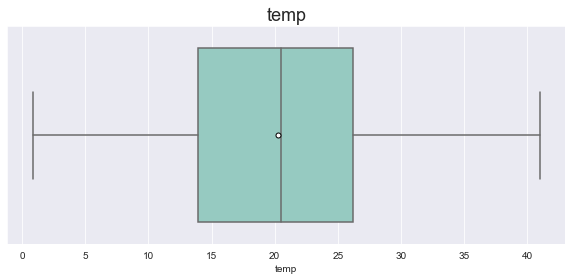

Mean is 20.0 | Median is 20.0 
# Outliers over upper limit (45.0) are 0
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


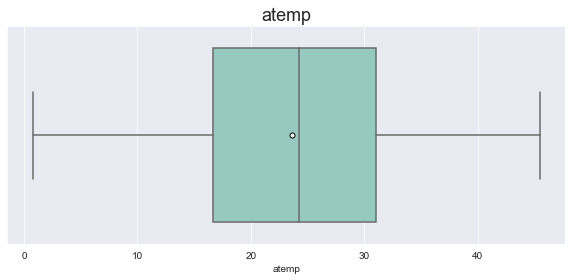

Mean is 24.0 | Median is 24.0 
# Outliers over upper limit (53.0) are 0
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


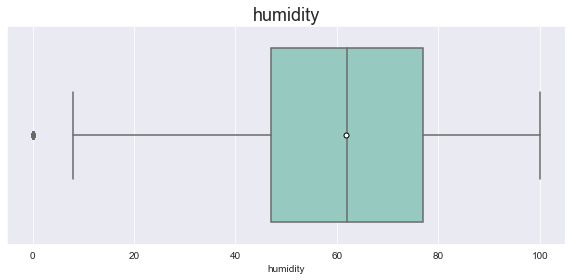

Mean is 62.0 | Median is 62.0 
# Outliers over upper limit (122.0) are 0
# Outliers under lower limit (2.0) are 22
                                                                                
--------------------------------------------------------------------------------
                                                                                


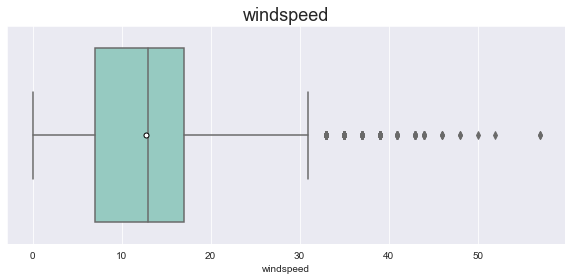

Mean is 13.0 | Median is 13.0 
# Outliers over upper limit (32.0) are 227
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


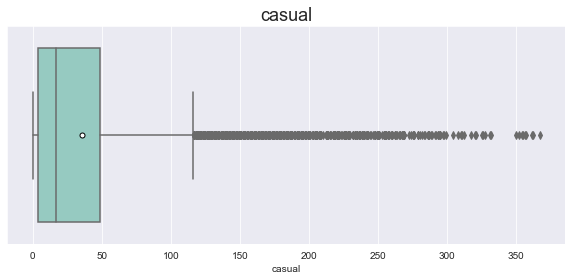

Mean is 36.0 | Median is 17.0 
# Outliers over upper limit (116.0) are 749
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


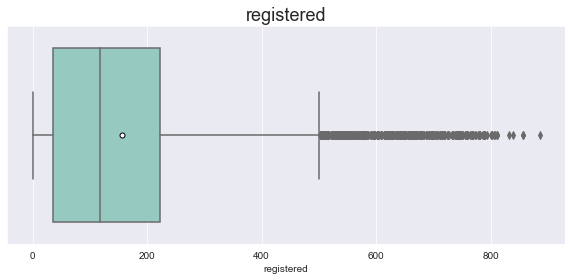

Mean is 156.0 | Median is 118.0 
# Outliers over upper limit (501.0) are 423
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


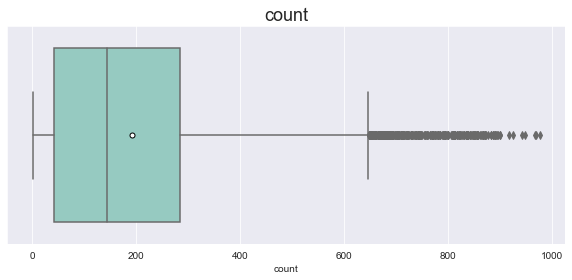

Mean is 192.0 | Median is 145.0 
# Outliers over upper limit (647.0) are 300
# Outliers under lower limit (0) are 0
                                                                                
--------------------------------------------------------------------------------
                                                                                


In [17]:
outlier_function(data)

## E5. Outliers Treatment (for count column)

In [104]:
## From box plot of "count", we know there are outliers on the max side, over 647
wd_count_data = data[data["count"] < 647]

# F. Univariate Analysis

## F1. Code Block (Univariate plots function)

In [18]:
## Univariate analysis function

## https://medium.datadriveninvestor.com/how-to-decide-on-the-number-of-bins-of-a-histogram-3c36dc5b1cd8

def univariate_plots(dataframe):
    for feature in dataframe.columns[1:]:
        n = len(feature)
        if is_numeric_dtype(dataframe[feature]) == True:
            
            ## Freedman-Diaconis rule (for finding no of bins)
            Q3 = data[feature].quantile(.75)
            Q1 = data[feature].quantile(.25)
            IQR = Q3 - Q1
            max_value = max(data[feature])
            min_value = min(data[feature])
            
            bin_width = (2 * IQR) / (n** (1 / 3))
            bin_count = int(np.ceil((max_value - min_value) / bin_width))
            
            if bin_count < 10:
                ## Sturge’s rule (for finding no of bins)
                bin_count = int(np.ceil(np.log2(n)) + 1)
            
            if bin_count < 10: 
                ## 10 is default
                bin_count = 10
            
            sns.histplot(data = dataframe, x = feature, bins = bin_count ,kde = True)
            plt.title(f"Histplot of {feature}", fontsize = 18)
            plt.xlabel(feature,fontsize = 14)
            plt.ylabel(f"Count of {feature}",fontsize = 14)
            plt.xticks(fontsize = 12)
            plt.yticks(fontsize = 12)
            plt.show()
            print(" "*80)
            print(" "*7 + "-"*74)
            print(" "*80)
        else:
            m = data[feature].nunique()
            sns.countplot(x = feature, data = dataframe, palette = "Set2",order= data[feature].value_counts().index[0:m])
            ageb_txt = list(data[feature].value_counts())

            for idx,val in enumerate(ageb_txt):
                plt.text(idx,val+.1,str(val),fontsize=12,ha="center")
            
            plt.title(f"Countplot of {feature}", fontsize = 18)
            plt.xlabel(feature,fontsize = 14)
            plt.ylabel(f"Count of {feature}",fontsize = 14)
            plt.xticks(fontsize = 12)
            plt.yticks(fontsize = 12)
            plt.show()
            print(" "*80)
            print(" "*7 + "-"*74)
            print(" "*80)

## F2. Implementation of univariate_plots function

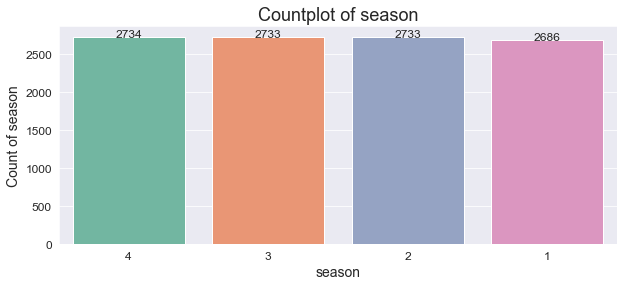

                                                                                
       --------------------------------------------------------------------------
                                                                                


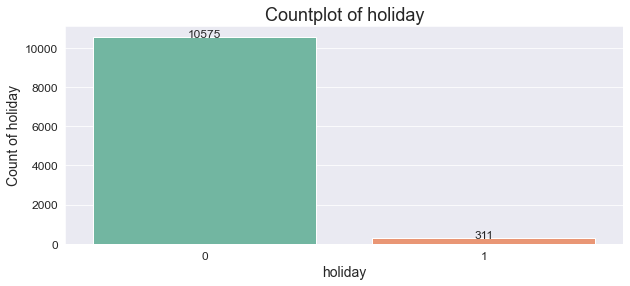

                                                                                
       --------------------------------------------------------------------------
                                                                                


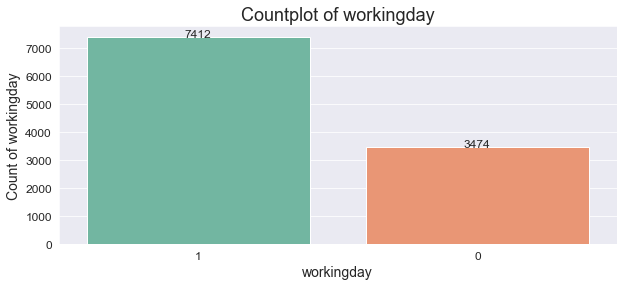

                                                                                
       --------------------------------------------------------------------------
                                                                                


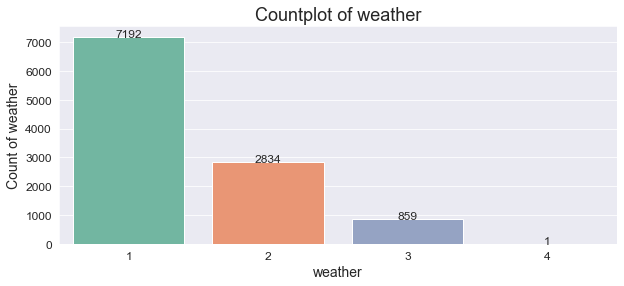

                                                                                
       --------------------------------------------------------------------------
                                                                                


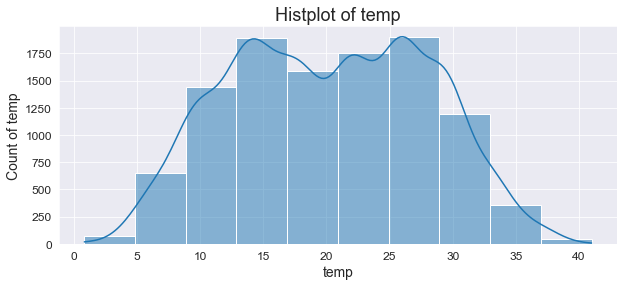

                                                                                
       --------------------------------------------------------------------------
                                                                                


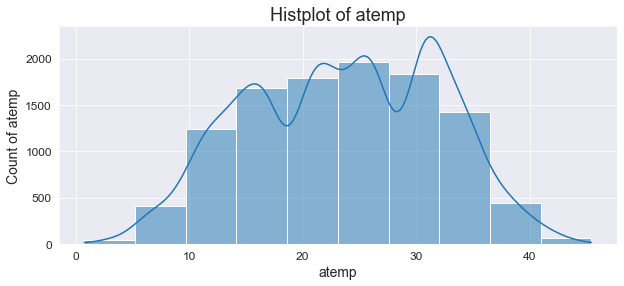

                                                                                
       --------------------------------------------------------------------------
                                                                                


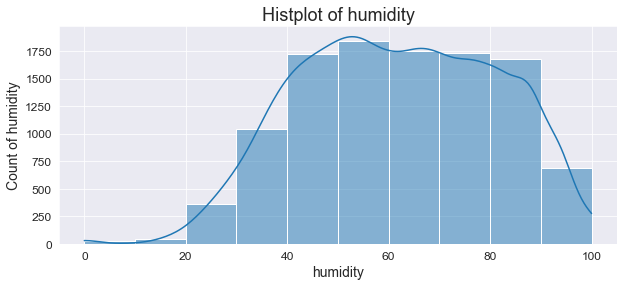

                                                                                
       --------------------------------------------------------------------------
                                                                                


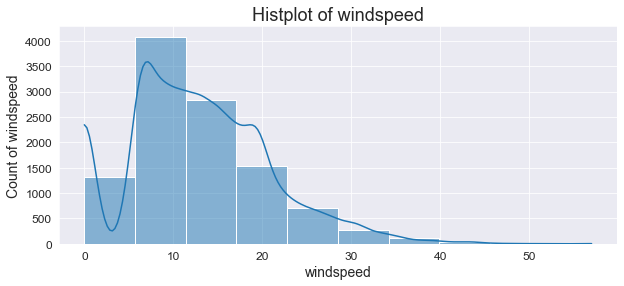

                                                                                
       --------------------------------------------------------------------------
                                                                                


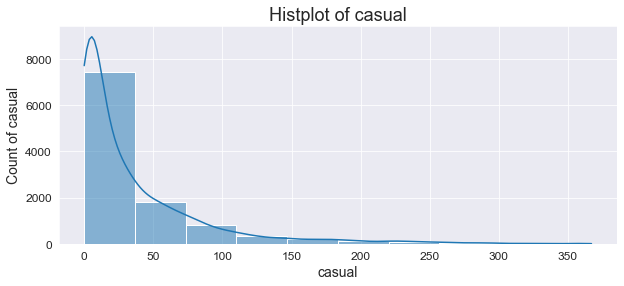

                                                                                
       --------------------------------------------------------------------------
                                                                                


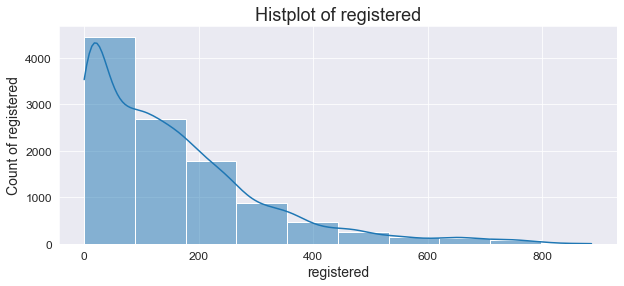

                                                                                
       --------------------------------------------------------------------------
                                                                                


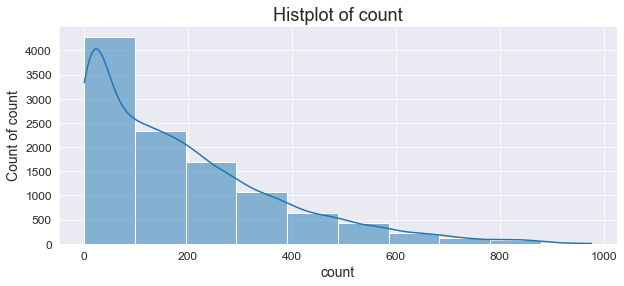

                                                                                
       --------------------------------------------------------------------------
                                                                                


In [19]:
univariate_plots(data)

# G. Multivariate plots

## G1. Pairplot

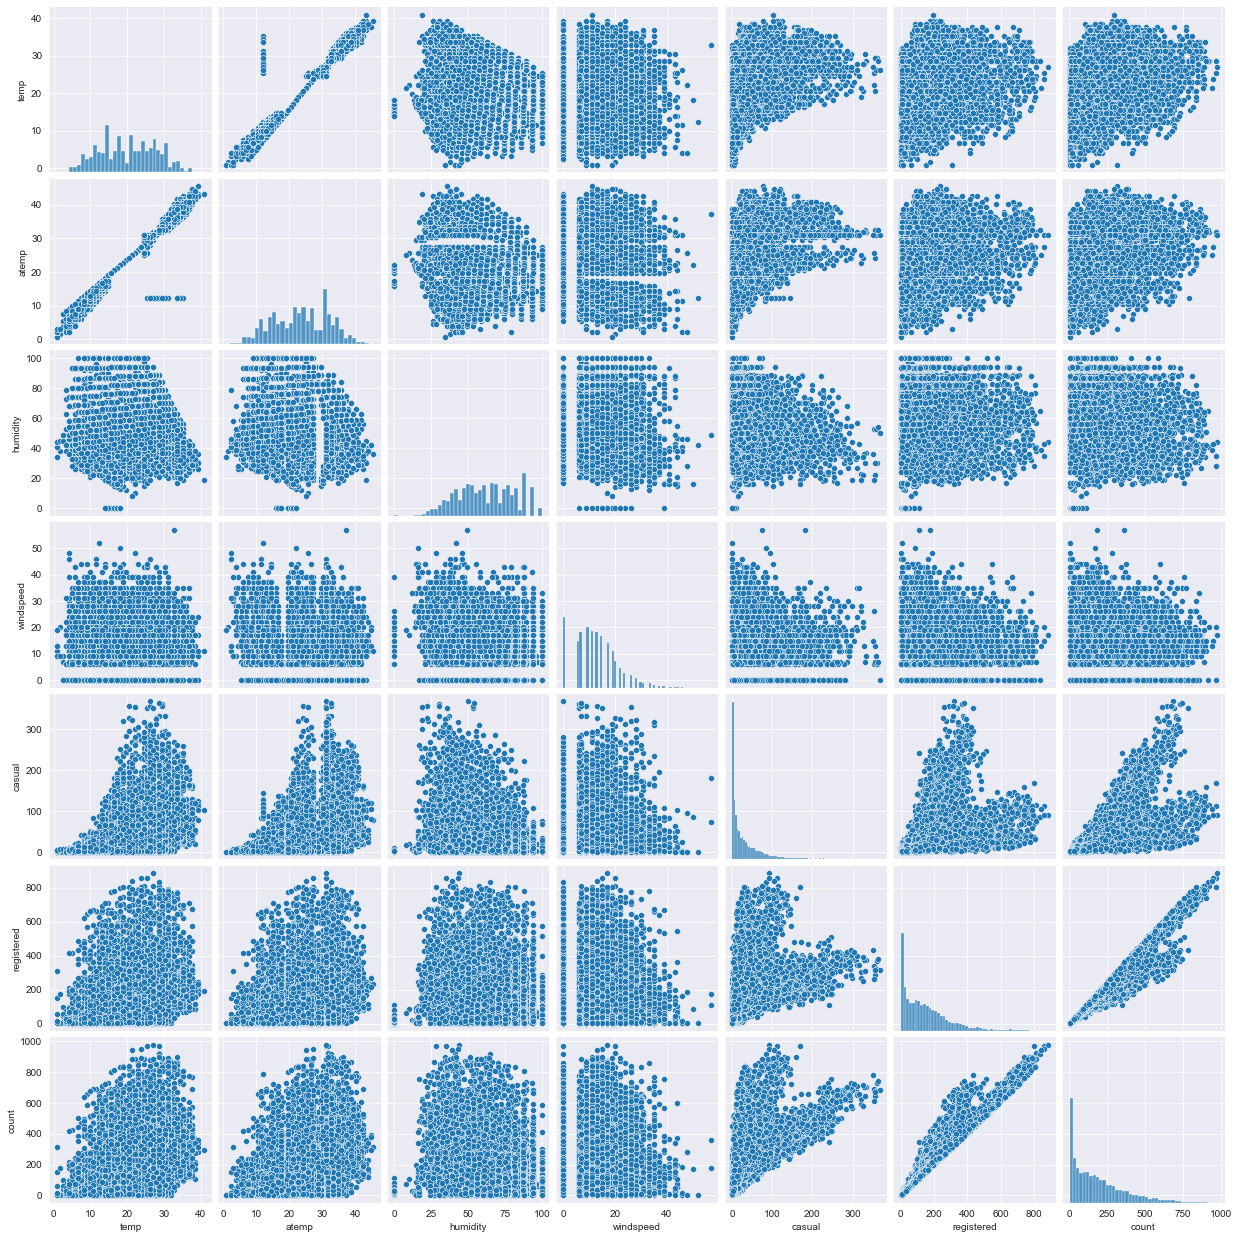

In [26]:
sns.pairplot(data)
plt.show()

## G2. Correlation Matrix

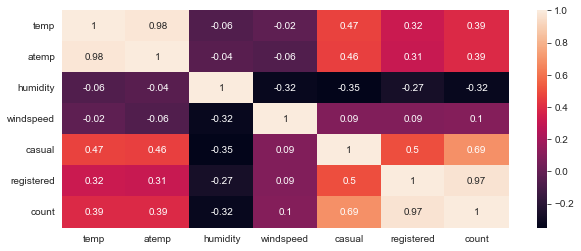

In [27]:
corr_matrix = data.corr().round(2)
sns.heatmap(corr_matrix, annot=True, fmt='g')
plt.show()

### Comment
- High positive correlaton: temp & atemp, count & registered, count & casual
- High negative correlation: humidity & count, humidity & registered, humidity & casual
- Very low correlation: temp & humidity, temp & windspeed, atemp & humidity, atemp & windspeed, windspeed & count,windspeed & casual, windspeed & registered

# H. Problem Solving

## Q1: 2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented

## 1.1 Visual Analysis

### 1.1.1 Total bike rentals by workingday field

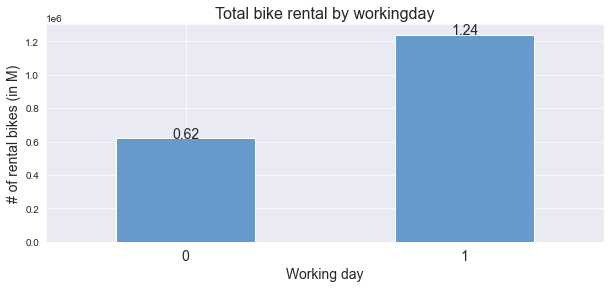

In [30]:
wd_count_data.groupby("workingday")["count"].sum().plot(kind="bar",color = "#6699cc")
plt.title("Total bike rental by workingday", fontsize = 16)
plt.xlabel("Working day", fontsize = 14)
plt.ylabel("# of rental bikes (in M)", fontsize = 14)
plt.xticks(rotation = 0, fontsize = 14)

ageb_txt = list(wd_count_data.groupby("workingday")["count"].sum())
ageb_txt = [round(i/1000000,2) for i in ageb_txt]

for idx,val in enumerate(ageb_txt):
    plt.text(idx,(val*10**6)+1,str(val),fontsize=14,ha="center")

plt.show()

### Comment:
- Bike rentals on weekdays is double than on weekends

### 1.1.2 Average bike rentals by workingday field

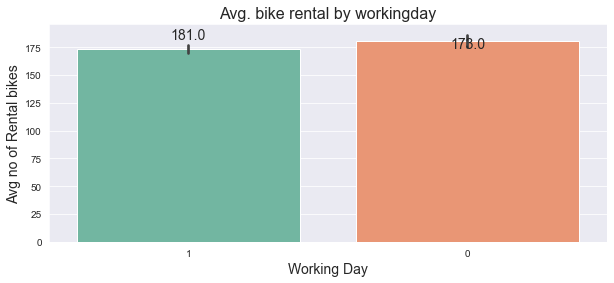

In [31]:
sns.barplot(x = "workingday", y = "count", data = wd_count_data, palette = "Set2",order = wd_count_data["workingday"].value_counts().index[0:2])
sns.set_style('darkgrid')

plt.title("Avg. bike rental by workingday", fontsize = 16)
plt.xlabel("Working Day", fontsize = 14)
plt.ylabel("Avg no of Rental bikes", fontsize = 14)

ageb_txt = list(wd_count_data.groupby("workingday")["count"].mean())
ageb_txt = [round(i,0) for i in ageb_txt]
ageb_txt.sort(reverse = True)

for idx,val in enumerate(ageb_txt):
    plt.text(idx,val+1,str(val),fontsize=14,ha="center")

plt.show()

### Comment:
- Average bike rentals per day (weekday or weekend) looks close, but need to verify statistically if they are same

## 1.2 Hypothesis Formulation

In [32]:
'''
H0: Population mean of bike rentals on weekday = weekends
H1: Population mean of bike rentals on weekday != weekends
alpha = 95%
'''

'\nH0: Population mean of bike rentals on weekday = weekends\nH1: Population mean of bike rentals on weekday != weekends\nalpha = 95%\n'

## Code block (for later use)

In [33]:
## Two sample T test Code
def t_test(sample1, sample2, alpha):
    
    xbar1 = np.mean(sample1)
    s1 = np.std(sample1,ddof = 1)
    n1 = len(sample1)
    
    xbar2 = np.mean(sample2)
    s2 = np.std(sample2,ddof = 1)
    n2 = len(sample2)
    dof = n1 + n2 - 2
    
    Tobs = (xbar1 - xbar2) / np.sqrt(s1**2 / n1 + s2**2 / n2)
    
    Tcritical = stats.t.ppf(alpha,dof) 
    
    print(f"Tobs is {round(Tobs,2)} and Tcritical is {round(Tcritical,2)}")
    
    if Tobs > 0:
        if Tobs > Tcritical:
            print("Reject the null hypothesis")
        else:
            print("We fail to reject the null hypothesis")
    else:
        if Tobs > Tcritical:
            print("We fail to reject the null hypothesis") 
        else:
            print("Reject the null hypothesis")

### Creating datasets for workingday and weekend

In [34]:
workingday_data = wd_count_data["count"][wd_count_data["workingday"] == "1"]
weekend_data = wd_count_data["count"][wd_count_data["workingday"] == "0"]

In [117]:
p1 =np.mean(wd_count_data.loc[wd_count_data["workingday"]=="1"]["count"])

173.01159055997766

In [118]:
p1 = data.loc[data["workingday"]=="1"]["count"]
p2 = data.loc[data["workingday"]=="0"]["count"]

In [119]:
t_test(p1, p2, 0.95)

Tobs is 1.24 and Tcritical is 1.64
We fail to reject the null hypothesis


## 1.3 Selecting appropriate test: 2 sample T test
- We could have used 2 sample Z test, as no of rows are sufficient. 
  However we are using T test as it is asked in the problem statement.
  But using T test should also give us same result as we have good no of rows. Hence T test will behave similar to Z test.

## 1.4 Check Test Assumptions

### 1.4.1 No of rows of datasets assumption

In [35]:
print(weekend_data.count())
print(workingday_data.count())

3422
7161


### Comment:
- Dataset size are comparable

### 1.4.2 Checking Standard deviation assumption

In [36]:
print(np.std(weekend_data).round(2))
print(np.std(workingday_data).round(2))

163.76
152.35


### Comment:
- Standard devaition is also comparable

## 1.5 Find the p-value (using the code block mentioned above)

In [37]:
t_test(weekend_data,workingday_data,0.95)

Tobs is 2.39 and Tcritical is 1.64
Reject the null hypothesis


## 1.6 Conclusion based on the p-value
- Since Tobs is greater than Tcritical, we can not say if the average count of bike rentals on weekdays and weekends are same
- So working day has an effect on number of electric cycles rented

--------------------------------------------------------------------------------------------------------------------------------

# Q2: ANNOVA to check if No. of cycles rented is similar or different in different 1. weather 2. season

## Case 1:  If No. of cycles rented is similar or different in different weather conditions

## 1.1 Visual Analysis

###  1.1.1 Rental bicycles by weather plot

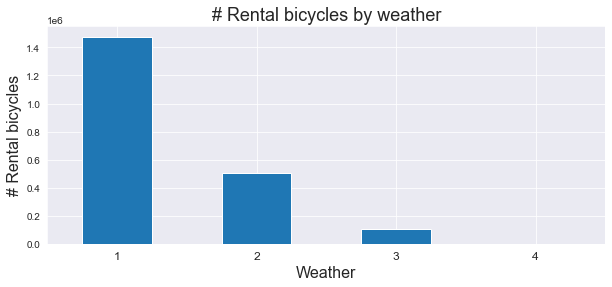

In [42]:
data.groupby(by =(["weather"]))["count"].sum().plot(kind="bar")

plt.title("# Rental bicycles by weather", fontsize = 18)
plt.xlabel("Weather",fontsize = 16)
plt.ylabel("# Rental bicycles",fontsize = 16)
plt.xticks(rotation = 0,fontsize =12)

plt.show()

### 1.1.2 Avg rental bicycles by weather plot

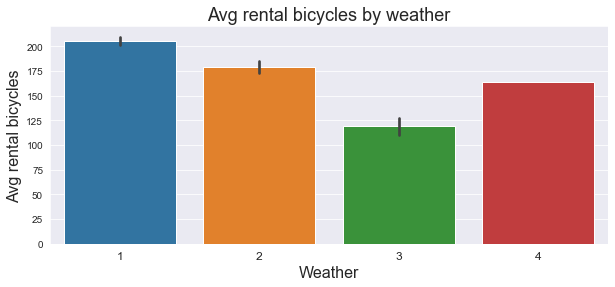

In [43]:
sns.barplot(x= "weather" , y = "count" , data = data)
plt.title("Avg rental bicycles by weather", fontsize = 18)
plt.xlabel("Weather",fontsize = 16)
plt.ylabel("Avg rental bicycles",fontsize = 16)
plt.xticks(rotation = 0,fontsize =12)
plt.show()

### Comment
- In both the above plots it looks like no of cycles rented in different weather conditions are different.
  However, we need to prove it statistically

## 1.2 Hypothesis formulation

In [45]:
'''
H0: Average no of cycles rented are significantly same in different weather conditions
H1: Average no of cycles rented are not significantly same in different weather conditions

alpha = 5%
'''

'\nH0: Average no of cycles rented are significantly same in different weather conditions\nH1: Average no of cycles rented are not significantly same in different weather conditions\n\nalpha = 5%\n'

## 1.3 Test: One way Anova

In [46]:
## Weather groups
## Using the dataset, with no outliers in count column
w1 = wd_count_data["count"][wd_count_data["weather"] == "1"]
w2 = wd_count_data["count"][wd_count_data["weather"] == "2"]
w3 = wd_count_data["count"][wd_count_data["weather"] == "3"]
w4 = wd_count_data["count"][wd_count_data["weather"] == "4"]

## 1.4 Assumption verification

In [47]:
'''
1. Each group's observations follow gaussian distribution
2. Each group's variance is roughly the same
3. Each observations are independent
'''

"\n1. Each group's observations follow gaussian distribution\n2. Each group's variance is roughly the same\n3. Each observations are independent\n"

### 1.4.1a Assumption 1: Using QQ plot

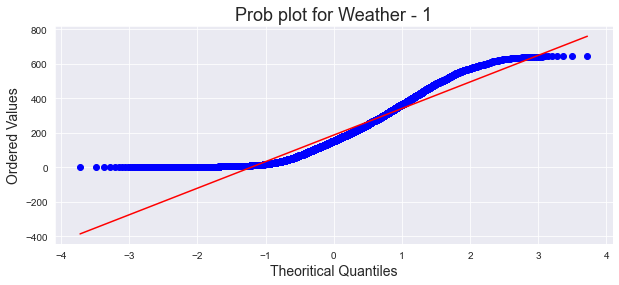

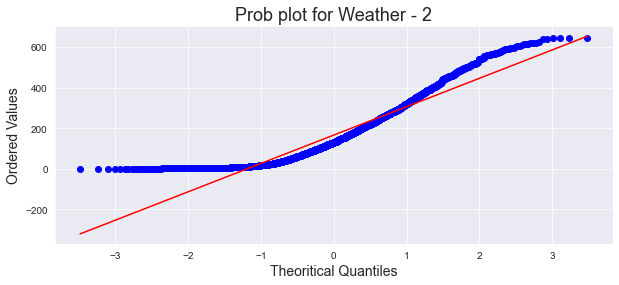

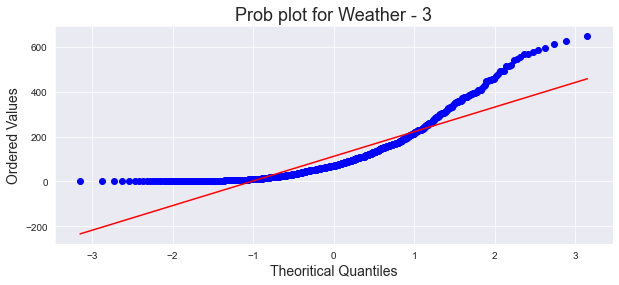

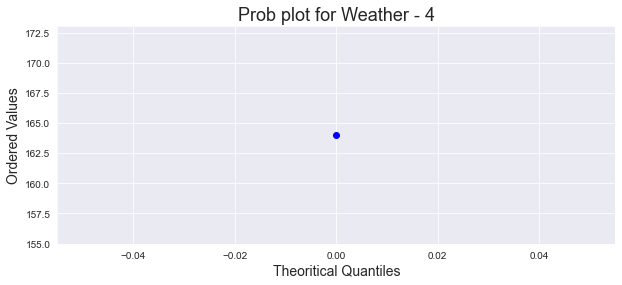

In [48]:
weather_count = wd_count_data["weather"].unique()
for weather in weather_count:
    stats.probplot(wd_count_data[wd_count_data["weather"] == weather]['count'], dist = 'norm', plot = plt)
    plt.title(f"Prob plot for Weather - {weather}", fontsize = 18)
    plt.xlabel("Theoritical Quantiles", fontsize = 14)
    plt.ylabel("Ordered Values", fontsize = 14)
    plt.show()

In [120]:
sns.qqplot((stats.boxcox(w1)[0]))
plt.show()

AttributeError: module 'seaborn' has no attribute 'qqplot'

### Comment
- As in none of the charts point lie on the line, data does not seem to be normally distributed for any of the samples
- Assumption 1 might fail. To be sure, we are checking normality using KS test.

### 1.4.1a Assumption 1: Using KS test

In [49]:
'''
H0 = The sample comes from a normal distribution.
HA = The sample is not coming from a normal distribution.
'''

'\nH0 = The sample comes from a normal distribution.\nHA = The sample is not coming from a normal distribution.\n'

In [50]:
alpha = 0.05
def ks_test(column):
    a,b = stats.kstest(column, 'norm')
    print("Statistics",a,"p-value",b)
    if b >= alpha:
        print("We fail to reject null hypothesis")
    else:
        print("We can reject null hypothesis")

In [51]:
ks_test(w1)

Statistics 0.9778227535052846 p-value 0.0
We can reject null hypothesis


In [52]:
ks_test(w2)

Statistics 0.9773504629792003 p-value 0.0
We can reject null hypothesis


In [53]:
ks_test(w3)

Statistics 0.9607792798165267 p-value 0.0
We can reject null hypothesis


In [54]:
ks_test(w4)

Statistics 1.0 p-value 0.0
We can reject null hypothesis


### Comment
- Data is not normally distributed, assumption 1 might failed.
- Need to apply transformation and check normality again

### Applying log transformation

In [55]:
w1_log = np.log(w1)
w2_log = np.log(w2)
w3_log = np.log(w3)
w4_log = np.log(w4)

In [56]:
ks_test(w1_log)

Statistics 0.9019376608953673 p-value 0.0
We can reject null hypothesis


In [57]:
ks_test(w2_log)

Statistics 0.9002373527760978 p-value 0.0
We can reject null hypothesis


In [58]:
ks_test(w3_log)

Statistics 0.8591808660189251 p-value 0.0
We can reject null hypothesis


In [59]:
ks_test(w4_log)

Statistics 0.9999998300533717 p-value 3.398932566511803e-07
We can reject null hypothesis


### Comment:
- Even after applying log transformation, data in either of the groups is not normally distributed
- Assumption 1 is failed

### 1.4.2 Assumption 2 validation

In [60]:
v1,v2,v3,v4 = np.var(w1),np.var(w2),np.var(w3),np.var(w4)
print(v1,v2,v3,v4)

26024.851661698445 21598.971708741155 14680.24340622837 0.0


### Comment:
- Variance is not roughly same
- Assumtion 2 is also failed

## 1.5 Since Anova assumptions 1 and 2 failed, we need to use a non parametric test

### 1.5.1 Test: Kruskal-Wallis test

### 1.5.2 Hypothesis formulation

In [106]:
'''
H0: The median is equal across all groups.

Ha: The median is not equal across all groups.

alpha = 5%
'''

'\nH0: The median is equal across all groups.\n\nHa: The median is not equal across all groups.\n\nalpha = 5%\n'

### 1.5.3 Assumptions Verification
- Since it is non parametric test, no assumption regarding underlying distribution and population are made

### 1.5.4 Finding p-value

In [64]:
stats.kruskal(w1,w2,w3,w4)

KruskalResult(statistic=186.98317555232958, pvalue=2.7369378742733244e-40)

### 1.5.5 Conclusion based on the p-value

In [65]:
## Since p-value is 0, which is less than 0.05, hence we will reject null hypothesis
## The median rental bikes are not equal across different weather conditions.

--------------------------------------------------------------------------------------------------------------------------------

## Case 2: If No. of cycles rented is similar or different in different seasons

## 2.1 Visual Analysis

### 2.1.1 Rental bicycles by season plot

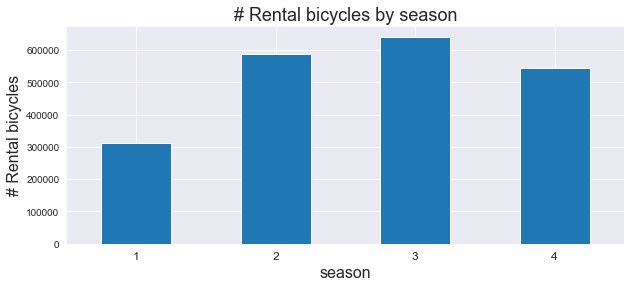

In [66]:
data.groupby(by =(["season"]))["count"].sum().plot(kind="bar")

plt.title("# Rental bicycles by season", fontsize = 18)
plt.xlabel("season",fontsize = 16)
plt.ylabel("# Rental bicycles",fontsize = 16)
plt.xticks(rotation = 0,fontsize =12)

plt.show()

### 2.1.2 Avg rental bicycles by season plot

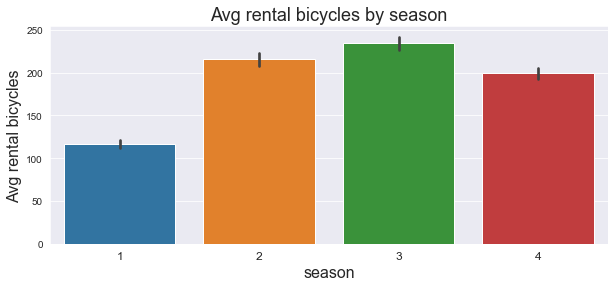

In [67]:
sns.barplot(x= "season" , y = "count" , data = data)
plt.title("Avg rental bicycles by season", fontsize = 18)
plt.xlabel("season",fontsize = 16)
plt.ylabel("Avg rental bicycles",fontsize = 16)
plt.xticks(rotation = 0,fontsize =12)
plt.show()

### Comment
- In both the above plots it looks like no of cycles rented in different seasons are different
- However, we need to prove it statistically

## 2.2 Test: One way Anova

## 2.3 Hypothesis formulation

In [69]:
'''
H0: Average no of cycles rented are significantly same in different seasons
H1: Average no of cycles rented are not significantly same in different seasons

alpha = 5%
'''

'\nH0: Average no of cycles rented are significantly same in different seasons\nH1: Average no of cycles rented are not significantly same in different seasons\n\nalpha = 5%\n'

In [70]:
## season groups
## Using the dataset, with no outliers in count column
Season1 = wd_count_data["count"][wd_count_data["season"] == "1"]
Season2 = wd_count_data["count"][wd_count_data["season"] == "2"]
Season3 = wd_count_data["count"][wd_count_data["season"] == "3"]
Season4 = wd_count_data["count"][wd_count_data["season"] == "4"]

## 2.4 Assumption varification

In [71]:
'''
1. Each group's observations follow gaussian distribution
2. Each group's variance is roughly the same
3. Each observations are independent
'''

"\n1. Each group's observations follow gaussian distribution\n2. Each group's variance is roughly the same\n3. Each observations are independent\n"

### 2.4.1a Assumption 1: Using QQ plot

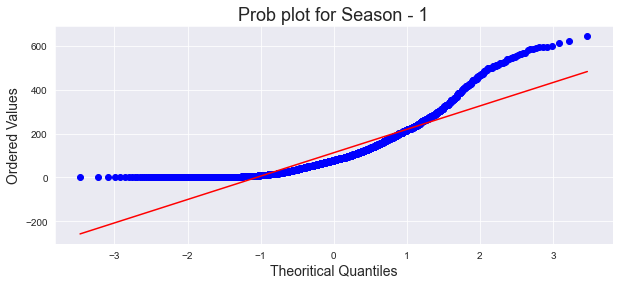

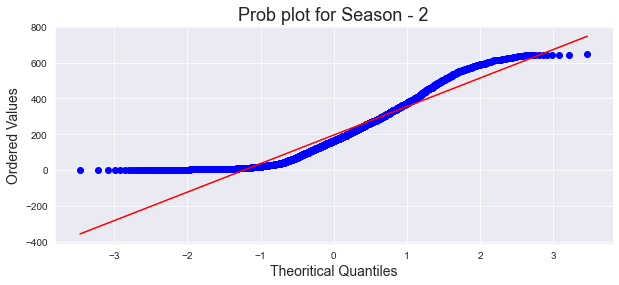

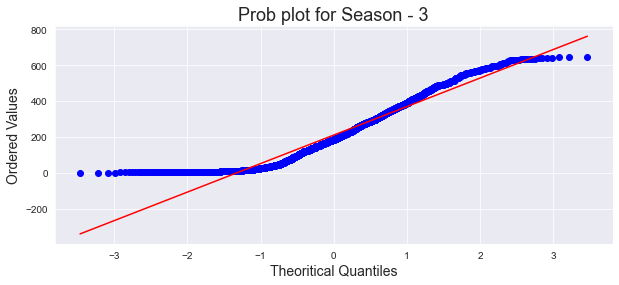

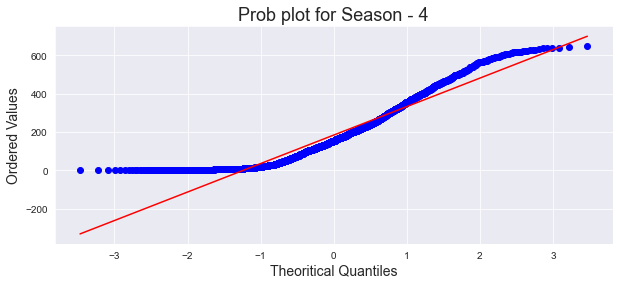

In [72]:
season_count = wd_count_data["season"].unique()
for season in season_count:
    stats.probplot(wd_count_data[wd_count_data["season"] == season]['count'], dist = 'norm', plot = plt)
    plt.title(f"Prob plot for Season - {season}", fontsize = 18)
    plt.xlabel("Theoritical Quantiles", fontsize = 14)
    plt.ylabel("Ordered Values", fontsize = 14)
    plt.show()

### Comment
- As in none of the charts point lie on the line, data does not seem to be normally distributed for any of the samples
- Assumption 1 might fail. To be sure, we are checking normality using KS test.

### 2.4.1b Assumption 1: Using KS test

In [73]:
'''
H0 = The sample comes from a normal distribution.
HA = The sample is not coming from a normal distribution.
'''

'\nH0 = The sample comes from a normal distribution.\nHA = The sample is not coming from a normal distribution.\n'

In [74]:
ks_test(Season1)

Statistics 0.9487854485761653 p-value 0.0
We can reject null hypothesis


In [75]:
ks_test(Season2)

Statistics 0.9830785106276939 p-value 0.0
We can reject null hypothesis


In [76]:
ks_test(Season3)

Statistics 0.9940629460050672 p-value 0.0
We can reject null hypothesis


In [77]:
ks_test(Season4)

Statistics 0.9870134653317333 p-value 0.0
We can reject null hypothesis


### Comment
- Data is not normally distributed, assumption 1 might failed.
- Need to apply transformation and check normality again

### Performing Log tranformation

In [78]:
Season1_log = np.log(Season1)
Season2_log = np.log(Season2)
Season3_log = np.log(Season3)
Season4_log = np.log(Season4)

In [79]:
ks_test(Season1_log)

Statistics 0.8442046863789285 p-value 0.0
We can reject null hypothesis


In [80]:
ks_test(Season2_log)

Statistics 0.907204601292224 p-value 0.0
We can reject null hypothesis


In [81]:
ks_test(Season3_log)

Statistics 0.9274815263704188 p-value 0.0
We can reject null hypothesis


In [82]:
ks_test(Season4_log)

Statistics 0.912363197031906 p-value 0.0
We can reject null hypothesis


### Comment:
- Even after applying log transformation, data in either of the groups is not normally distributed
- Assumption 1 is failed

### 2.4.2 Assumption 2

In [83]:
var1,var2,var3,var4 = np.var(Season1),np.var(Season2),np.var(Season3),np.var(Season4)
print(var1,var2,var3,var4)

13656.969639215027 27602.248426836977 26903.92941797244 23880.774693048905


### Comment:
- Variance is roughly same
- Assumtion 2 is passed

## 2.5 Since Anova assumption 1 failed (data is not normal), we need to use a non parametric test

### 2.5.1 Test: Kruskal-Wallis test

### 2.5.2 Hypothesis formulation

In [86]:
'''
H0: The median is equal across all groups.

Ha: The median is not equal across all groups.

alpha = 5%
'''

'\nH0: The median is equal across all groups.\n\nHa: The median is not equal across all groups.\n\nalpha = 5%\n'

### 2.5.3 Assumptions Verification
- Since it is non parametric test, no assumption regarding underlying distribution and population are made

### 2.5.4 Finding p-value

In [87]:
stats.kruskal(Season1,Season2,Season3,Season4)

KruskalResult(statistic=619.3679817851395, pvalue=6.376253250003707e-134)

### 2.5.5 Conclusion based on the p-value

In [88]:
## Since p-value is 0, which is less than 0.05, hence we will reject null hypothesis
## The median is not equal across all groups.

--------------------------------------------------------------------------------------------------------------------------------

# Q3: Chi-square test to check if Weather is dependent on the season

## 3.1 Visual Analysis

### 3.1.1 Weather

In [89]:
## Field description: Weather
'''
1: Clear (66%)
2: Mist / Cloudy (26%)
3: Light Snow / Light Rain (8%)
4: Heavy Rain / Ice Pallets (0%)
'''

'\n1: Clear (66%)\n2: Mist / Cloudy (26%)\n3: Light Snow / Light Rain (8%)\n4: Heavy Rain / Ice Pallets (0%)\n'

In [90]:
## Percentage of no of days by weather conditions
round((data["weather"].value_counts() / data["weather"].count() )* 100,0)

1    66.0
2    26.0
3     8.0
4     0.0
Name: weather, dtype: float64

### Comment
- Weather is distributed unevenly among days

### 3.1.2 Season

In [91]:
## Field description: Season
'''
1: spring
2: summer
3: fall 
4: winter
''' 

'\n1: spring\n2: summer\n3: fall \n4: winter\n'

In [92]:
## Percentage of no of days by seasons
round((data["season"].value_counts() / data["season"].count() )* 100,0)

4    25.0
3    25.0
2    25.0
1    25.0
Name: season, dtype: float64

### Comment: 
- Even distribution of season

### 3.1.3 Countplot for no of days by season in different weather conditions

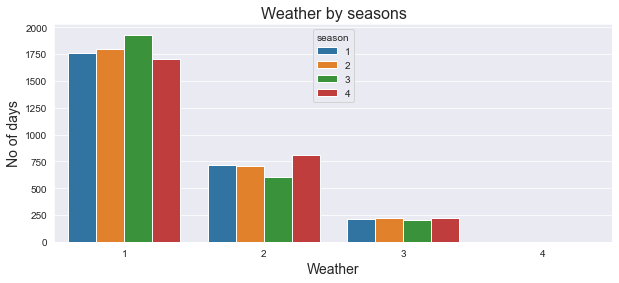

In [93]:
sns.countplot(x = "weather" ,  data = data , hue = "season")
plt.title("Weather by seasons", fontsize = 16)
plt.xlabel("Weather", fontsize = 14)
plt.ylabel("No of days", fontsize = 14)
plt.show()

### Comment
- The below plot shows we have similar no of days by seasons with a weather type 
- We need to check if weather and season are singnificanty dependent or not

### 3.1.4 Countplot for no of days by different weather conditions in different seasons

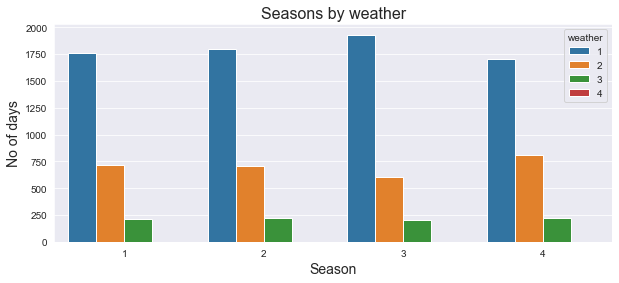

In [94]:
sns.countplot(x = "season" ,  data = data , hue = "weather")
plt.title("Seasons by weather", fontsize = 16)
plt.xlabel("Season", fontsize = 14)
plt.ylabel("No of days", fontsize = 14)
plt.show()

### Comment
- The below plot shows, in a season we have a lot more clear days, than cloudy or light rain / mist
- We need to check if weather and season are singnificanty dependent or not

## 3.2 Hypothesis formulation

In [95]:
'''
H0: There is no significant relation between Weather and season
H1: There is significant relation between Weather and season

alpha = 5%
'''

'\nH0: There is no significant relation between Weather and season\nH1: There is significant relation between Weather and season\n\nalpha = 5%\n'

## 3.3 Test: Chi square test of Independence

### Contingency Table

In [96]:
cont_table = pd.crosstab(index=data['weather'], columns=data['season'], margins=True)
cont_table

season,1,2,3,4,All
weather,,,,,
1,1759,1801,1930,1702,7192
2,715,708,604,807,2834
3,211,224,199,225,859
4,1,0,0,0,1
All,2686,2733,2733,2734,10886


## 3.4 Assumption verification

In [ ]:
'''
1. Both variables are categorical.
Comment: Both season and weather are categorical variables.

2. All observations are independent
Comment: In the dataset it is given that a particluar day in a season has only one weather
         and it does not depend on any other day.

3. Cells in the contingency table are mutually exclusive.
Comment: A unique day in the dataset has a single season and weather combination. There are no duplicates in days.

4. Expected value of cells should be 5 or greater in at least 80% of cells.
Comment: 12 / 16 cells (75%, close to 80%) have expected value more than 5 (see expected value in 3.5)
         Expected value can also be manually calculated using contingency table.
'''

## 3.5 Finding p value

In [98]:
observation = np.array([cont_table.iloc[0][0:4].values,
                        cont_table.iloc[1][0:4].values,
                        cont_table.iloc[2][0:4].values,
                        cont_table.iloc[3][0:4].values])
observation

array([[1759, 1801, 1930, 1702],
       [ 715,  708,  604,  807],
       [ 211,  224,  199,  225],
       [   1,    0,    0,    0]], dtype=int64)

In [99]:
chi2, p_value, dof, expected_value = stats.chi2_contingency(observation)
p_value

1.5499250736864862e-07

In [100]:
expected_value

array([[1.77454639e+03, 1.80559765e+03, 1.80559765e+03, 1.80625831e+03],
       [6.99258130e+02, 7.11493845e+02, 7.11493845e+02, 7.11754180e+02],
       [2.11948742e+02, 2.15657450e+02, 2.15657450e+02, 2.15736359e+02],
       [2.46738931e-01, 2.51056403e-01, 2.51056403e-01, 2.51148264e-01]])

## 3.6 Conclusion based on the p-value

In [101]:
'''
p_value is less than alpha (5%), 

Hence we can reject null hypothesis and there is significant relation between Weather and season.
'''

'\np_value is less than alpha (5%), \n\nHence we can reject null hypothesis and there is significant relation between Weather and season.\n'